In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pickle
%matplotlib inline

In [2]:
import glob
import tensorflow as tf
import numpy as np

In [ ]:
n_im = glob.glob('/home/mpiscil/CarND-Capstone/our_dataset/unknown/*.png')
g_im = glob.glob('/home/mpiscil/CarND-Capstone/our_dataset/green/*.png')
r_im = glob.glob('/home/mpiscil/CarND-Capstone/our_dataset/red/*.png')
n_classes = 3
X_train_1 = np.array([])
Y_train_1 = np.array([])
for temp_im in n_im:
    newimage = cv2.imread(temp_im)
    if X_train_1.shape[0] == 0:
        X_train_1 = np.array([newimage])
    else:	
        #X_train = np.concatenate((X_train, np.array([newimage])),axis=0)	
        X_train_1 = np.vstack((X_train_1, np.array([newimage])))	
    Y_train_1 = np.append(Y_train_1, 1)

for temp_im in g_im:
    newimage = cv2.imread(temp_im)
    #newimage = np.reshape(newimage,-1)
    X_train_1 = np.vstack((X_train_1,np.array([newimage])))	
    Y_train_1 = np.append(Y_train_1, 2)

for temp_im in r_im:
    newimage = cv2.imread(temp_im)
    #newimage = np.reshape(newimage,-1)
    X_train_1 = np.vstack((X_train_1,np.array([newimage])))	
    Y_train_1 = np.append(Y_train_1, 0)
with open('dataset_tl_1.pickle', 'wb') as f:
    pickle.dump((X_train_1, Y_train_1), f)

In [3]:
with open('dataset_tl_1.pickle', 'rb') as f:
    (X_train_3, Y_train_3) = pickle.load(f)
print("Train shape: ")
print(X_train_3.shape)
print(Y_train_3.shape)
n_classes = 3
Class_names = ["RED","UNKNOWN", "GREEN"]

Train shape: 
(1061, 600, 800, 3)
(1061,)


In [4]:
X_train_1, Y_train_1 = shuffle(X_train_3, Y_train_3)
X_train_2, X_valid, Y_train_2, Y_valid = train_test_split(X_train_1, Y_train_1, test_size=0.10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_train_2, Y_train_2, test_size=0.05, random_state=42)

print("Train shape: ")
print(X_train.shape)
print("Valid shape: ")
print(X_valid.shape)
print("Test shape: ")
print(X_test.shape)

Train shape: 
(906, 600, 800, 3)
Valid shape: 
(107, 600, 800, 3)
Test shape: 
(48, 600, 800, 3)


In [5]:
n_classes = 3

layer1 = (5,5,3,4)
layer2 = (5,5,4,5)
layer3 = (5,5,5,6)
layer4 = (5,5,6,7)
layer5 = (5,5,7,7)
layer6 = (2058,32)
layer7 = (32,16)
layer8 = (16,n_classes)

from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.15

conv1_W = tf.Variable(tf.truncated_normal(shape=layer1, mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(layer1[3]))

conv2_W = tf.Variable(tf.truncated_normal(shape=layer2, mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(layer2[3]))

conv3_W = tf.Variable(tf.truncated_normal(shape=layer3, mean = mu, stddev = sigma))
conv3_b = tf.Variable(tf.zeros(layer3[3]))

conv4_W = tf.Variable(tf.truncated_normal(shape=layer4, mean = mu, stddev = sigma))
conv4_b = tf.Variable(tf.zeros(layer4[3]))

conv5_W = tf.Variable(tf.truncated_normal(shape=layer5, mean = mu, stddev = sigma))
conv5_b = tf.Variable(tf.zeros(layer5[3]))

fc1_W = tf.Variable(tf.truncated_normal(shape=layer6, mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(layer6[1]))

fc2_W  = tf.Variable(tf.truncated_normal(shape=layer7, mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(layer7[1]))

fc3_W  = tf.Variable(tf.truncated_normal(shape=layer8, mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(n_classes))

keep_prob = tf.placeholder("float")

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    x_color = x[:,:,:,0:3]
    conv1 = tf.nn.conv2d(x_color, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv4 = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    conv4 = tf.nn.relu(conv4)
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv5 = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    conv5 = tf.nn.relu(conv5)
    conv5 = tf.nn.max_pool(conv5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #fc0   = tf.concat([flatten(conv5),flatten(conv4)],1)
    fc0   = flatten(conv5)
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1   = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
    
x = tf.placeholder(tf.float32, (None, 600, 800, 3))
y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y, n_classes)
logits = LeNet(x)

print(y)
print(x)
print(one_hot_y)

saver = tf.train.Saver()

Tensor("Placeholder_2:0", dtype=int32)
Tensor("Placeholder_1:0", shape=(?, 600, 800, 3), dtype=float32)
Tensor("one_hot:0", dtype=float32)


In [ ]:
EPOCHS = 100
BATCH_SIZE = 32
rate = 0.001
beta = 0.001
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
loss_operation = tf.reduce_mean(cross_entropy + \
    beta*tf.nn.l2_loss(conv1_W) + \
    beta*tf.nn.l2_loss(conv2_W) + \
    beta*tf.nn.l2_loss(conv3_W) + \
    beta*tf.nn.l2_loss(conv4_W) + \
    beta*tf.nn.l2_loss(conv5_W) + \
    beta*tf.nn.l2_loss(fc1_W) + \
    beta*tf.nn.l2_loss(fc2_W))
training_operation = optimizer.minimize(loss_operation)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

INFO:tensorflow:Restoring parameters from ./lenet
Real =  UNKNOWN Predicted =  RED


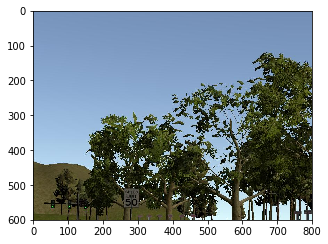

Real =  UNKNOWN Predicted =  RED


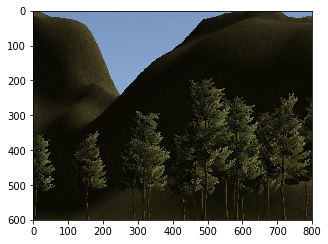

Real =  UNKNOWN Predicted =  GREEN


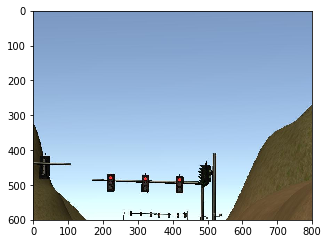

Real =  UNKNOWN Predicted =  RED


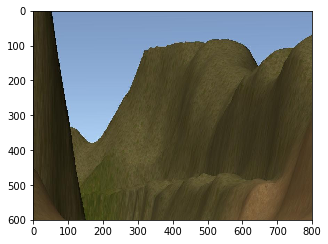

Real =  UNKNOWN Predicted =  RED


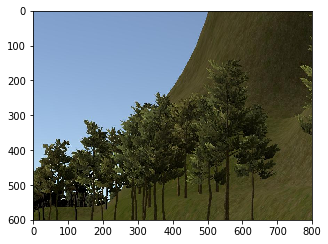

Real =  GREEN Predicted =  RED


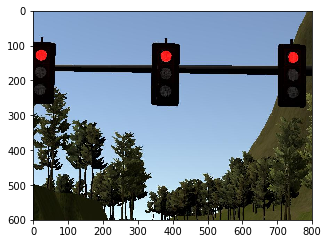

Real =  GREEN Predicted =  UNKNOWN


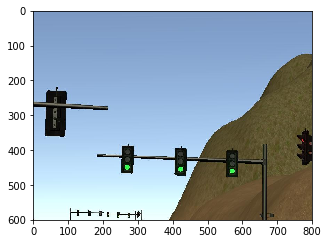

Real =  GREEN Predicted =  RED


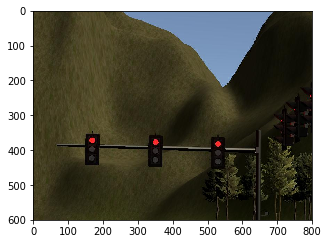

Real =  GREEN Predicted =  UNKNOWN


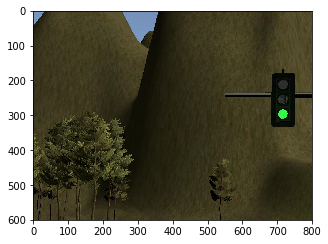

Real =  GREEN Predicted =  RED


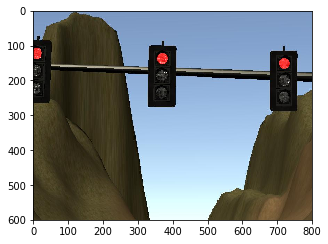

Real =  GREEN Predicted =  UNKNOWN


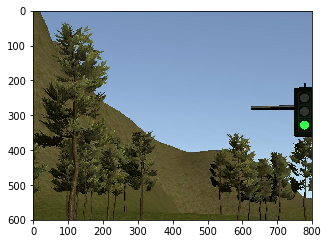

Real =  GREEN Predicted =  UNKNOWN


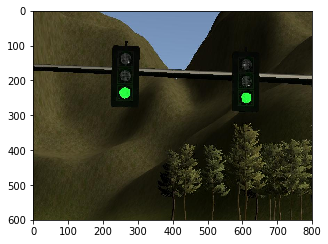

Real =  GREEN Predicted =  RED


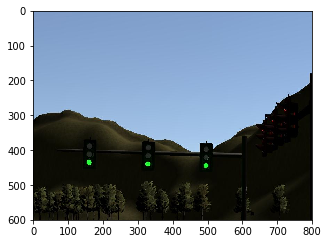

Real =  GREEN Predicted =  RED


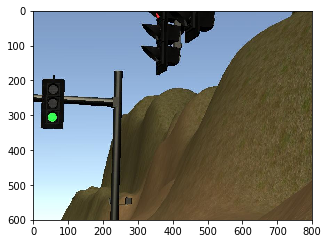

Real =  GREEN Predicted =  UNKNOWN


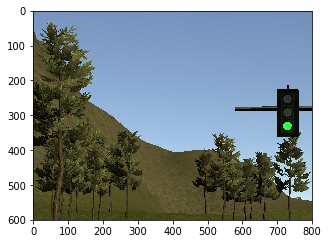

Real =  GREEN Predicted =  UNKNOWN


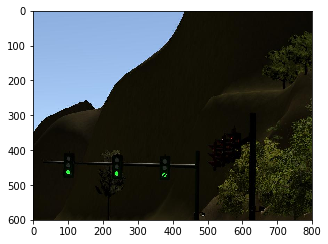

Real =  GREEN Predicted =  UNKNOWN


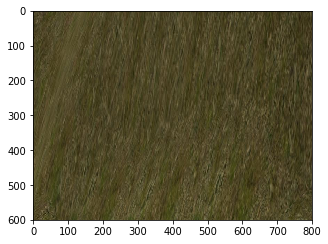

Real =  RED Predicted =  GREEN


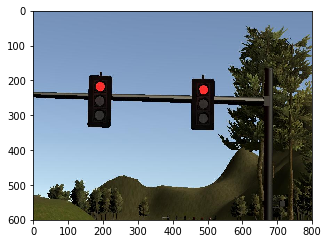

Real =  RED Predicted =  UNKNOWN


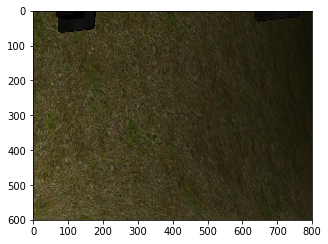

Real =  RED Predicted =  UNKNOWN


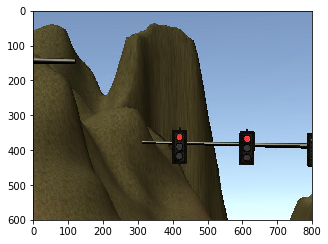

Real =  RED Predicted =  UNKNOWN


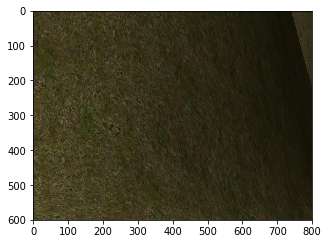

Real =  RED Predicted =  UNKNOWN


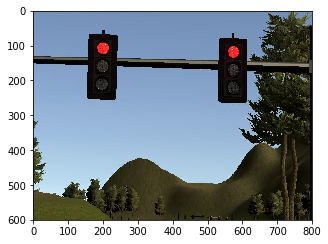

Real =  RED Predicted =  UNKNOWN


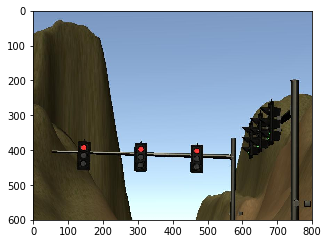

0.9783223374175306


In [6]:
def predict_test(sess, X_data, y_data):
    prediction = sess.run(tf.argmax(logits,1), feed_dict={x: X_data, y: y_data ,keep_prob : 1.0})
    return prediction

incorrect = 0
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    for i in range(X_train_3.shape[0]):
    #for i in range(10):
        predictions = predict_test(sess, X_train_3[i:i+1], Y_train_3[i:i+1])
        #print(X_train_3[i:i+1].shape)
        if(predictions[0] != Y_train_3[i]):            
            incorrect += 1
            print("Real = ", Class_names[int(Y_train_3[i])] , "Predicted = ", Class_names[predictions[0]])
            newimg2 = cv2.cvtColor(X_train_3[i], cv2.COLOR_RGB2BGR);
            plt.figure(figsize=(5,5))
            plt.imshow(newimg2)
            plt.show()
        
right_percent = 1.0 - incorrect / Y_train_3.shape[0]
print(right_percent)